<br>

## random shit

In [79]:
import sys
#!pixi add httpx
#!pixi add sweetviz
#!{sys.executable} -m pip install httpx
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install sweetviz
#!{sys.executable} -m pip install ipyleaflet

<br>

## import libraries

In [111]:
import pandas as pd
import httpx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sv
import seaborn as sns
import causalpy as cp

from ipyleaflet import Map, Marker, basemaps, LayersControl


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [81]:
#pip install plotly

<br>

## scrape home

In [ ]:
URI = "https://home.dk/umbraco/backoffice/home-api/Search"

params_k = dict(CurrentPageNumber=2,
              SearchResultsPerPage=800,
              q="København kommune",
              BoligKanLejes=True,
              BoligTilSalg=True,
              SearchType=0)

params_f = dict(CurrentPageNumber=2,
              SearchResultsPerPage=800,
              q="Frederiksberg kommune",
              BoligKanLejes=True,
              BoligTilSalg=True,
              SearchType=0)

In [ ]:
scrape_k = httpx.get(url=URI, params=params_k)
scrape_f = httpx.get(url=URI, params=params_f)

In [ ]:
data_k = scrape_k.json()
data_f = scrape_f.json()
#data.keys()

In [ ]:
#pd.DataFrame(data["searchResults"])

<br>

## scrape boliga

In [ ]:
URI = "https://api.boliga.dk/api/v2/sold/search/results"

params_k = dict(searchTab=1,
              propertyType=3,
              municipality=101,
              page=1,
              sort="date-d",
)

params_f = dict(searchTab=1,
              propertyType=3,
              municipality=147,
              page=1,
              sort="date-d",
)

In [ ]:
r_k = httpx.get(url=URI, params=params_k)
r_f = httpx.get(url=URI, params=params_f)

In [ ]:
data_k = r_k.json()
data_f = r_f.json()
pages_k = data_k["meta"]["totalPages"] + 1 # Python starts are zero
pages_f = data_f["meta"]["totalPages"] + 1 # Python starts are zero

In [ ]:
def scrape_to_data(pages, params):
    storage = []
    for page in range(1, pages):

        params["page"] = page
        r = httpx.get(url=URI, params=params, timeout=30)

        storage.extend(r.json()["results"])

        if page % 100 == 0:
            print(f'{page} of pages')
    
    print(f"completed {pages} pages")

    return pd.DataFrame(storage)

df_k = scrape_to_data(pages_k, params_k)
df_f = scrape_to_data(pages_f, params_f)

In [ ]:
df = pd.concat([df_f,df_k])
df

<br>

### Conversion to csv file

In [ ]:
df.to_csv("bolig.csv.gzip", compression="gzip", index=False)

<br>

### Reading the csv file so there is no need for scraping the website boliga again. 
 Last scraped Tuesday the 26.09.2023

In [92]:
df = pd.read_csv("/Users/sofiepelvig/apartments/assets/data/bolig.csv.gzip", compression="gzip", parse_dates=["soldDate"])
df

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
0,0,"Åboulevard 35, 1. th",1960,5400000,2023-09-20 22:00:00+00:00,3,Alm. Salg,55102.040,4.0,98,...,0.000000,1E65440F-F71C-4DC0-9B4F-CFF6782EB4D6,55.684840,12.551123,147,221223,Frederiksberg C,NaN,True,184708
1,0,"Borups Alle 116, 2. th",2000,4195000,2023-09-14 22:00:00+00:00,3,Alm. Salg,52437.500,3.0,80,...,0.000000,7F866136-B56E-4BE5-8695-0E6DAD2E00B0,55.693672,12.533304,147,13582,Frederiksberg,NaN,True,175058
2,1993747,"Harsdorffsvej 4B, st. th",1874,3475000,2023-09-13 22:00:00+00:00,3,Alm. Salg,56967.215,2.0,61,...,-0.572246,6310B883-5F91-4690-BDDB-15157487458E,55.679310,12.546504,147,188935,Frederiksberg C,NaN,True,183893
3,0,"Roskildevej 53, 2. 207",2000,1250000,2023-09-13 22:00:00+00:00,3,Fam. Salg,19230.770,2.0,65,...,0.000000,583219EB-22E7-4D53-9BF0-D8786F3953CD,55.671980,12.511993,147,175566,Frederiksberg,NaN,True,184459
4,1999954,"Rådmand Steins Alle 15, 2. th",2000,3744000,2023-09-12 22:00:00+00:00,3,Alm. Salg,34990.652,4.0,107,...,0.000000,191C546B-C71B-4C89-8AED-2967AFC138C7,55.672897,12.499296,147,108524,Frederiksberg,NaN,True,186808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99206,0,"Hørsholmsgade 8, 3. tv",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,225431.580,2.0,53,...,0.000000,805A8D01-9BF6-4047-8164-4DF8324C489D,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99207,0,"Hørsholmsgade 8, 4. th",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,217234.080,2.0,55,...,0.000000,3243A2DA-3BAE-493A-BFC7-F6ACAE031022,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99208,0,"Hørsholmsgade 8, 4. tv",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,225431.580,2.0,53,...,0.000000,DA7226E2-F5C9-43D1-AEE6-F928CE45212E,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99209,0,"Peter Fabers Gade 41, 2. th",2200,250000,1992-01-03 23:00:00+00:00,3,Alm. Salg,5000.000,2.0,50,...,0.000000,D9388837-4672-4B9A-A1FE-C65BB6397DD8,55.691830,12.556379,101,436128,København N,NaN,True,146895


<br>

## Importér prisindex

In [39]:
pris_index = pd.read_csv("prisindex.csv",sep=";")
pris_index.T.reset_index()
#collect the year 1992-2023 and the right region (københavn+frederiksberg)

FileNotFoundError: [Errno 2] No such file or directory: 'prisindex.csv'

<br>

## Data filtration

In [112]:
df[df['saleType'] == 'Fam. Salg']

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
3,0,"Roskildevej 53, 2. 207",2000,1250000,2023-09-13 22:00:00+00:00,3,Fam. Salg,19230.770,2.0,65,...,0.0,583219EB-22E7-4D53-9BF0-D8786F3953CD,55.671980,12.511993,147,175566,Frederiksberg,NaN,True,184459
5,0,"Kronprinsesse Sofies Vej 22, 4. 3",2000,1650000,2023-09-11 22:00:00+00:00,3,Fam. Salg,48529.410,1.0,34,...,0.0,11D1ED83-4292-4AFE-B662-E597F8B7289A,55.689743,12.534538,147,192525,Frederiksberg,NaN,True,173670
8,0,"Finsensvej 5C, 2. tv",2000,3530000,2023-09-07 22:00:00+00:00,3,Fam. Salg,42530.120,3.0,83,...,0.0,EE03AD4C-BE04-49CC-9922-BDBD4AC74EA4,55.680737,12.520736,147,141688,Frederiksberg,NaN,True,182642
12,0,"Carit Etlars Vej 4A, 3. tv",1814,5550000,2023-09-04 22:00:00+00:00,3,Fam. Salg,51869.160,3.0,107,...,0.0,52CD416F-4B53-4C02-BA78-401400624EBC,55.673350,12.541167,147,17103,Frederiksberg C,NaN,True,180903
16,0,"Åboulevard 23, 3. th",1960,3145000,2023-08-30 22:00:00+00:00,3,Fam. Salg,19779.875,5.0,159,...,0.0,0BF2A59F-4947-40FC-9E9E-2D94FB055BF9,55.684456,12.554089,147,207174,Frederiksberg C,NaN,True,185595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99137,0,"Brønshøjgårdvej 15, st. tv",2700,783360,1992-01-23 23:00:00+00:00,3,Fam. Salg,15360.000,2.0,51,...,0.0,4AA0E7B3-5683-46EA-A4FB-FEC00CD1BA14,55.703080,12.495753,101,77217,Brønshøj,6.0,True,6003745
99138,0,"Brønshøjgårdvej 15, 1. tv",2700,783360,1992-01-23 23:00:00+00:00,3,Fam. Salg,15360.000,2.0,51,...,0.0,2C11603A-1272-4E5E-B0F9-D2312B67B449,55.703080,12.495753,101,77217,Brønshøj,6.0,True,6003745
99139,0,"Brønshøjgårdvej 15, 1. th",2700,783360,1992-01-23 23:00:00+00:00,3,Fam. Salg,15360.000,2.0,51,...,0.0,E2DA3A25-7807-4CAF-A886-AAF7BF48FC2E,55.703080,12.495753,101,77217,Brønshøj,6.0,True,6003745
99140,0,"Brønshøjgårdvej 15, 2. th",2700,783360,1992-01-23 23:00:00+00:00,3,Fam. Salg,15360.000,2.0,51,...,0.0,6AA459D2-E45D-4544-8542-9FE2380C870A,55.703080,12.495753,101,77217,Brønshøj,6.0,True,6003745


In [96]:
df[df['saleType'] == 'Alm. Salg']

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
0,0,"Åboulevard 35, 1. th",1960,5400000,2023-09-20 22:00:00+00:00,3,Alm. Salg,55102.040,4.0,98,...,0.000000,1E65440F-F71C-4DC0-9B4F-CFF6782EB4D6,55.684840,12.551123,147,221223,Frederiksberg C,NaN,True,184708
1,0,"Borups Alle 116, 2. th",2000,4195000,2023-09-14 22:00:00+00:00,3,Alm. Salg,52437.500,3.0,80,...,0.000000,7F866136-B56E-4BE5-8695-0E6DAD2E00B0,55.693672,12.533304,147,13582,Frederiksberg,NaN,True,175058
2,1993747,"Harsdorffsvej 4B, st. th",1874,3475000,2023-09-13 22:00:00+00:00,3,Alm. Salg,56967.215,2.0,61,...,-0.572246,6310B883-5F91-4690-BDDB-15157487458E,55.679310,12.546504,147,188935,Frederiksberg C,NaN,True,183893
4,1999954,"Rådmand Steins Alle 15, 2. th",2000,3744000,2023-09-12 22:00:00+00:00,3,Alm. Salg,34990.652,4.0,107,...,0.000000,191C546B-C71B-4C89-8AED-2967AFC138C7,55.672897,12.499296,147,108524,Frederiksberg,NaN,True,186808
6,1999672,"H. Schneekloths Vej 33, 3. 3",2000,3150000,2023-09-10 22:00:00+00:00,3,Alm. Salg,44366.195,2.0,71,...,1.777060,9CF08739-59C3-4159-97BD-E3968C6C8567,55.681435,12.507760,147,210698,Frederiksberg,NaN,True,190298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99206,0,"Hørsholmsgade 8, 3. tv",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,225431.580,2.0,53,...,0.000000,805A8D01-9BF6-4047-8164-4DF8324C489D,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99207,0,"Hørsholmsgade 8, 4. th",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,217234.080,2.0,55,...,0.000000,3243A2DA-3BAE-493A-BFC7-F6ACAE031022,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99208,0,"Hørsholmsgade 8, 4. tv",2200,11947874,1992-01-06 23:00:00+00:00,3,Alm. Salg,225431.580,2.0,53,...,0.000000,DA7226E2-F5C9-43D1-AEE6-F928CE45212E,55.690900,12.543945,101,260348,København N,1.0,True,6019808
99209,0,"Peter Fabers Gade 41, 2. th",2200,250000,1992-01-03 23:00:00+00:00,3,Alm. Salg,5000.000,2.0,50,...,0.000000,D9388837-4672-4B9A-A1FE-C65BB6397DD8,55.691830,12.556379,101,436128,København N,NaN,True,146895


In [98]:
#Sorting fam_salg away
alm_salg_df = df[df['saleType'] == 'Alm. Salg']

#Sorting apartments away that where sold for under 500.000 and above 9.000.000
alm_salg_df = alm_salg_df[(alm_salg_df['price'] > 5e5) & (alm_salg_df['price'] < 9e6)]


In [85]:
alm_salg_df

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
0,0,"Åboulevard 35, 1. th",1960,5400000,2023-09-20 22:00:00+00:00,3,Alm. Salg,55102.040,4.0,98,...,0.000000,1E65440F-F71C-4DC0-9B4F-CFF6782EB4D6,55.684840,12.551123,147,221223,Frederiksberg C,NaN,True,184708
1,0,"Borups Alle 116, 2. th",2000,4195000,2023-09-14 22:00:00+00:00,3,Alm. Salg,52437.500,3.0,80,...,0.000000,7F866136-B56E-4BE5-8695-0E6DAD2E00B0,55.693672,12.533304,147,13582,Frederiksberg,NaN,True,175058
2,1993747,"Harsdorffsvej 4B, st. th",1874,3475000,2023-09-13 22:00:00+00:00,3,Alm. Salg,56967.215,2.0,61,...,-0.572246,6310B883-5F91-4690-BDDB-15157487458E,55.679310,12.546504,147,188935,Frederiksberg C,NaN,True,183893
4,1999954,"Rådmand Steins Alle 15, 2. th",2000,3744000,2023-09-12 22:00:00+00:00,3,Alm. Salg,34990.652,4.0,107,...,0.000000,191C546B-C71B-4C89-8AED-2967AFC138C7,55.672897,12.499296,147,108524,Frederiksberg,NaN,True,186808
6,1999672,"H. Schneekloths Vej 33, 3. 3",2000,3150000,2023-09-10 22:00:00+00:00,3,Alm. Salg,44366.195,2.0,71,...,1.777060,9CF08739-59C3-4159-97BD-E3968C6C8567,55.681435,12.507760,147,210698,Frederiksberg,NaN,True,190298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99149,0,"Klerkegade 31, st. th",1308,2425000,1992-01-14 23:00:00+00:00,3,Alm. Salg,43303.570,1.0,56,...,0.000000,0771D5ED-D052-455F-BF7A-0392C9A20BC8,55.686985,12.582850,101,305783,København K,7.0,True,6000505
99150,0,"Klerkegade 31, st. tv",1308,2425000,1992-01-14 23:00:00+00:00,3,Alm. Salg,31907.895,2.0,76,...,0.000000,71897D86-0E0C-4835-8CCA-9472E606969A,55.686985,12.582850,101,305783,København K,7.0,True,6000505
99151,0,"Klerkegade 31, 2. th",1308,2425000,1992-01-14 23:00:00+00:00,3,Alm. Salg,28197.674,3.0,86,...,0.000000,23E9CA10-180E-4AF4-AE48-A962E6972A5B,55.686985,12.582850,101,305783,København K,7.0,True,6000505
99152,0,"Klerkegade 31, 2. tv",1308,2425000,1992-01-14 23:00:00+00:00,3,Alm. Salg,19556.451,4.0,124,...,0.000000,8ACE5C4F-DE98-484A-B4B3-7CD11DD4A73E,55.686985,12.582850,101,305783,København K,7.0,True,6000505


In [18]:
for header in alm_salg_df.columns:
    print(header)

estateId
address
zipCode
price
soldDate
propertyType
saleType
sqmPrice
rooms
size
buildYear
change
guid
latitude
longitude
municipalityCode
estateCode
city
groupKey
canGetVR
bfEnr


<br>

### Analysis Tool

In [ ]:
report = sv.analyze(alm_salg_df)
report.show_html()

<br>

## Most Common 

In [45]:
alm_salg_df[['rooms','price','zipCode','buildYear','sqmPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,85613.0,2.950627e+00,1.231613e+00,1.0000,2.0,3.000,4.000,18.0
price,85613.0,6.859409e+06,1.182294e+07,13372.0000,2050000.0,3350000.000,5825000.000,197500000.0
zipCode,85613.0,2.136385e+03,3.702797e+02,1050.0000,2000.0,2200.000,2400.000,2900.0
buildYear,85613.0,1.890864e+03,2.995973e+02,0.0000,1902.0,1933.000,1973.000,2023.0
sqmPrice,85613.0,1.007327e+05,2.909758e+05,93.1677,28750.0,41195.652,57432.434,7744657.5


In [9]:
alm_salg_df[['rooms']].value_counts(normalize=True)
#not include something that is under 0.001%procent
#include from 0.05%<
#the roomes should be from 1-5 

rooms
2.0      0.334038
3.0      0.310665
4.0      0.185895
1.0      0.073260
5.0      0.060972
6.0      0.023501
7.0      0.007908
8.0      0.002324
9.0      0.000888
10.0     0.000362
11.0     0.000093
13.0     0.000047
12.0     0.000023
14.0     0.000012
18.0     0.000012
Name: proportion, dtype: float64

In [63]:
alm_salg_df['price'].max()


8998000

In [13]:
pd.cut(alm_salg_df['price'],15)

0        (-184114.628, 13179147.2]
1        (-184114.628, 13179147.2]
2        (-184114.628, 13179147.2]
4        (-184114.628, 13179147.2]
6        (-184114.628, 13179147.2]
                   ...            
99206    (-184114.628, 13179147.2]
99207    (-184114.628, 13179147.2]
99208    (-184114.628, 13179147.2]
99209    (-184114.628, 13179147.2]
99210    (-184114.628, 13179147.2]
Name: price, Length: 85613, dtype: category
Categories (15, interval[float64, right]): [(-184114.628, 13179147.2] < (13179147.2, 26344922.4] < (26344922.4, 39510697.6] < (39510697.6, 52676472.8] ... (144836899.2, 158002674.4] < (158002674.4, 171168449.6] < (171168449.6, 184334224.8] < (184334224.8, 197500000.0]]

In [43]:
most_common_room = alm_salg_df['rooms'].value_counts().idxmax()
print('Most common number of roomes:',most_common_room)

Most common number of roomes: 2.0


In [44]:
most_common_price = alm_salg_df['price'].value_counts().idxmax()
print('Most common salespice:', most_common_price)

Most common salespice: 2500000


In [45]:
most_common_zip =  alm_salg_df['zipCode'].value_counts().idxmax()
print('Most common zip-code:',most_common_zip)

Most common zip-code: 2300


In [46]:
most_common_city = alm_salg_df['city'].value_counts().idxmax()
print('Most common city:',most_common_city)

Most common city: København S


In [47]:
most_common_buildYear = alm_salg_df['buildYear'].value_counts().idxmax()
print('Most common build year:',most_common_buildYear)

Most common build year: 1932


In [48]:
mean_sqmPrice = alm_salg_df['sqmPrice'].mean()
print('Most common square meter price:',mean_sqmPrice)

Most common square meter price: 39970.304646121884


In [49]:
import matplotlib.pyplot as plt

### Apartments that have the specs: sold for 2.5 mio, 2 room apartment, and in a buildig that whas build in 1932

In [50]:
common_apartment = alm_salg_df[(alm_salg_df['price'] == 2500000) & (alm_salg_df['rooms'] ==2.0) & (alm_salg_df['buildYear']==1932)]
common_apartment

,estateId,address,zipCode,price,soldDate,propertyType,saleType,sqmPrice,rooms,size,...,change,guid,latitude,longitude,municipalityCode,estateCode,city,groupKey,canGetVR,bfEnr
18994,1966755,"Horsekildevej 32, 4. th",2500,2500000,2023-04-27 22:00:00+00:00,3,Alm. Salg,43103.450,2.0,58,...,-3.660886,76A735BF-CBC0-481A-BD8A-E19B9B178A0A,55.668022,12.510014,101,239659,Valby,NaN,True,173421
19504,1973379,"Caprivej 1, 4. tv",2300,2500000,2023-03-28 22:00:00+00:00,3,Alm. Salg,39682.540,2.0,63,...,0.200401,7B64EA4E-4074-4411-93D2-EFD1886AA2A2,55.660908,12.621083,101,85678,København S,NaN,True,133311
21617,1936539,"Tølløsevej 33, st. tv",2700,2500000,2022-10-19 22:00:00+00:00,3,Alm. Salg,36231.883,2.0,69,...,-3.660886,A6B95789-980B-4BC4-9DA6-A86E3A252514,55.704582,12.488586,101,824047,Brønshøj,NaN,True,118457
27264,1822741,"Lauravej 19, 1. th",2500,2500000,2021-10-25 22:00:00+00:00,3,Alm. Salg,44642.855,2.0,56,...,0.200401,CD297D35-9653-4DD1-88E9-1AA2A8C69563,55.668633,12.510267,101,338355,Valby,NaN,True,173008
32667,1736011,"Mellemforts Allé 2, 3. th",2300,2500000,2021-03-02 23:00:00+00:00,3,Alm. Salg,37878.790,2.0,66,...,-1.960784,015ECE03-3D35-4DE9-8DC6-6F4671C98D03,55.660110,12.620139,101,374351,København S,NaN,True,132428
35483,1720991,"Caprivej 1, 4. th",2300,2500000,2020-11-22 23:00:00+00:00,3,Alm. Salg,44642.855,2.0,56,...,0.200401,AF18F6FF-231E-4419-B398-E96D0ECDE105,55.660908,12.621083,101,85651,København S,NaN,True,132829
43783,1583744,"Sankt Kjelds Plads 10, 4. th",2100,2500000,2019-09-20 22:00:00+00:00,3,Alm. Salg,43859.650,2.0,57,...,-7.235621,E1CC29D8-D993-4975-9945-D3E69956C14D,55.710934,12.565545,101,19439,København Ø,NaN,True,153440
44501,0,"Jernbane Allé 11, 1. th",2720,2500000,2019-08-17 22:00:00+00:00,3,Alm. Salg,36231.883,2.0,69,...,0.000000,84204F2C-47CC-496A-B13C-12842230C4B9,55.684530,12.492720,101,276619,Vanløse,NaN,True,173235
50016,1465730,"Lange-Müllers Gade 23, 1. tv",2100,2500000,2018-08-22 22:00:00+00:00,3,Alm. Salg,39062.500,2.0,64,...,-3.772132,367DD36E-4A66-4E7C-95DC-2D42F3E5F88A,55.712322,12.566906,101,335879,København Ø,NaN,True,156086
52696,1418818,"Lange-Müllers Gade 17, 4. th",2100,2500000,2018-04-07 22:00:00+00:00,3,Alm. Salg,45454.547,2.0,55,...,0.200401,099421AF-D48A-4E57-9C6C-B5B2006C3058,55.712030,12.566978,101,335356,København Ø,NaN,True,154810


<br>

## Histogrammer

<br>

Filtrering af lejligheder der koster over en halv mio

<br>

### Filtrering så vi har salgspriser fra 500.000 til 15 mio

<Axes: >

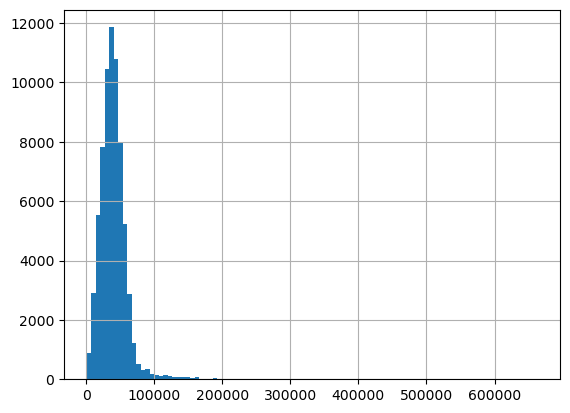

In [51]:
alm_salg_df[(alm_salg_df['price'] > 5e5) & (alm_salg_df['price'] < 15e6)]['sqmPrice'].hist(bins=100)

In [52]:
print('First sold appartment date:',df['soldDate'].min() )


First sold appartment date: 1992-01-01 23:00:00+00:00


<Axes: >

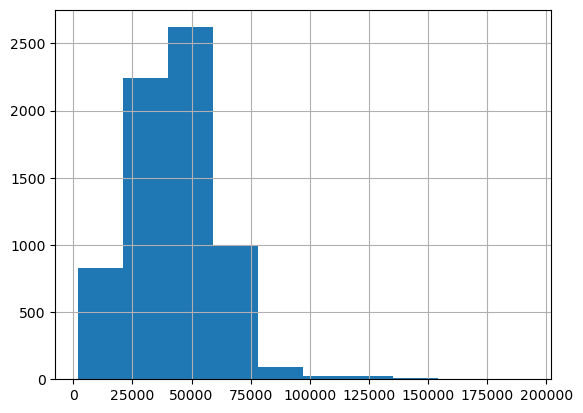

In [53]:
alm_salg_df[(alm_salg_df['zipCode'] < 1650) & (alm_salg_df['sqmPrice'] < 200000)]['sqmPrice'].hist()

<br>

## Scatter Plot af KBH

In [54]:
cities = alm_salg_df.groupby(['city']).size().reset_index(name='count')
cities

,city,count
0,Brønshøj,2289
1,Frederiksberg,7819
2,Frederiksberg C,3996
3,Hellerup,549
4,Kastrup,2
5,København K,5613
6,København N,5309
7,København NV,3077
8,København S,14559
9,København SV,3736


In [55]:
# Group by 'city' and get the distinct zip codes for each city
city_zip_codes = alm_salg_df.groupby('city')['zipCode'].unique().reset_index(name='zip_codes')

# 'city_zip_codes' now contains a list of distinct zip codes for each city
city_zip_codes

,city,zip_codes
0,Brønshøj,[2700]
1,Frederiksberg,[2000]
2,Frederiksberg C,"[1960, 1874, 1879, 1817, 1814, 1828, 1855, 180..."
3,Hellerup,[2900]
4,Kastrup,[2770]
5,København K,"[1429, 1308, 1364, 1302, 1370, 1209, 1129, 145..."
6,København N,[2200]
7,København NV,[2400]
8,København S,[2300]
9,København SV,[2450]


In [56]:
# Specify the target city
target_city = 'København K'

# Find the row for the target city
city_row = city_zip_codes[city_zip_codes['city'] == target_city]

# Check if the target city exists in the DataFrame
if not city_row.empty:
    zip_codes_for_target_city = city_row['zip_codes'].iloc[0]
    print(f"Zip codes for {target_city}: {', '.join(map(str, zip_codes_for_target_city))}")
else:
    print(f"{target_city} not found in the grouped data")


Zip codes for København K: 1429, 1308, 1364, 1302, 1370, 1209, 1129, 1455, 1157, 1422, 1307, 1063, 1401, 1127, 1428, 1432, 1408, 1208, 1425, 1270, 1264, 1423, 1171, 1123, 1156, 1454, 1310, 1051, 1303, 1427, 1436, 1150, 1107, 1467, 1466, 1359, 1117, 1151, 1159, 1153, 1358, 1316, 1368, 1363, 1418, 1356, 1057, 1205, 1054, 1468, 1319, 1462, 1366, 1402, 1169, 1354, 1434, 1424, 1415, 1317, 1416, 1437, 1260, 1360, 1400, 1253, 1367, 1306, 1453, 1311, 1055, 1452, 1066, 1458, 1300, 1211, 1430, 1112, 1161, 1420, 1313, 1304, 1173, 1251, 1204, 1355, 1357, 1052, 1210, 1472, 1124, 1255, 1165, 1071, 1350, 1154, 1352, 1407, 1110, 1206, 1250, 1268, 1459, 1256, 1116, 1201, 1460, 1315, 1113, 1267, 1362, 1414, 1114, 1130, 1439, 1254, 1101, 1174, 1200, 1104, 1175, 1068, 1207, 1058, 1263, 1265, 1118, 1100, 1202, 1115, 1131, 1067, 1166, 1470, 1411, 1062, 1203, 1074, 1451, 1053, 1119, 1361, 1172, 1464, 1072, 1266, 1456, 1152, 1050, 1103, 1369, 1160, 1410, 1471, 1406


/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


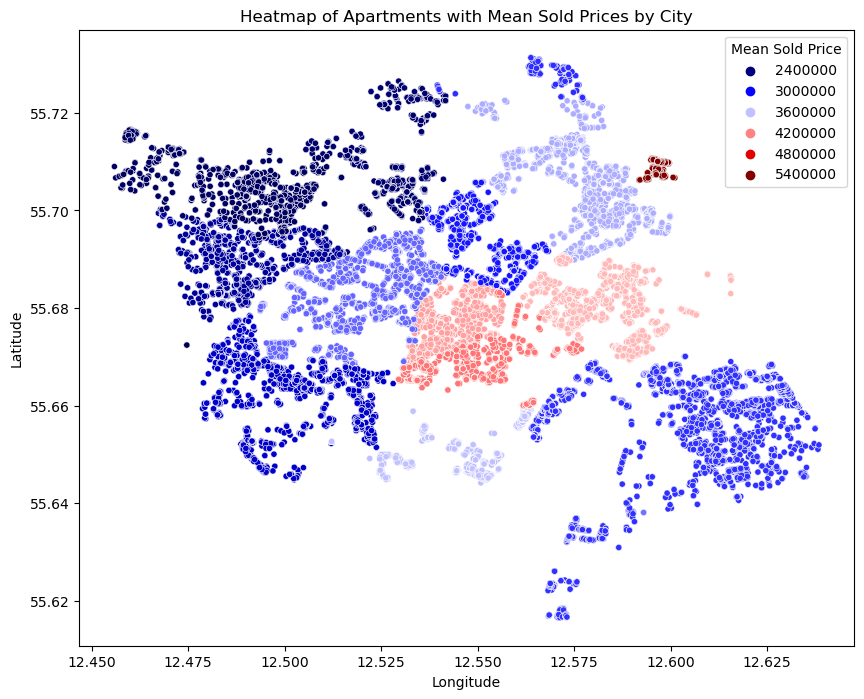

In [70]:
# Step 1: Calculate the mean sold price for each city
mean_prices_city = alm_salg_df.groupby('city')['price'].mean().reset_index()

# Step 2: Merge the mean sold price back into the original DataFrame
alm_salg_df_groupbby_city = alm_salg_df.merge(mean_prices_city, on='city', suffixes=('', '_mean'))

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(data=alm_salg_df_groupbby_city, x='longitude', y='latitude', hue='price_mean', palette='seismic', s=20)
plt.title('Heatmap of Apartments with Mean Sold Prices by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Mean Sold Price', loc='upper right')
plt.savefig('heatmap_meansold.pdf')
plt.show()


/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


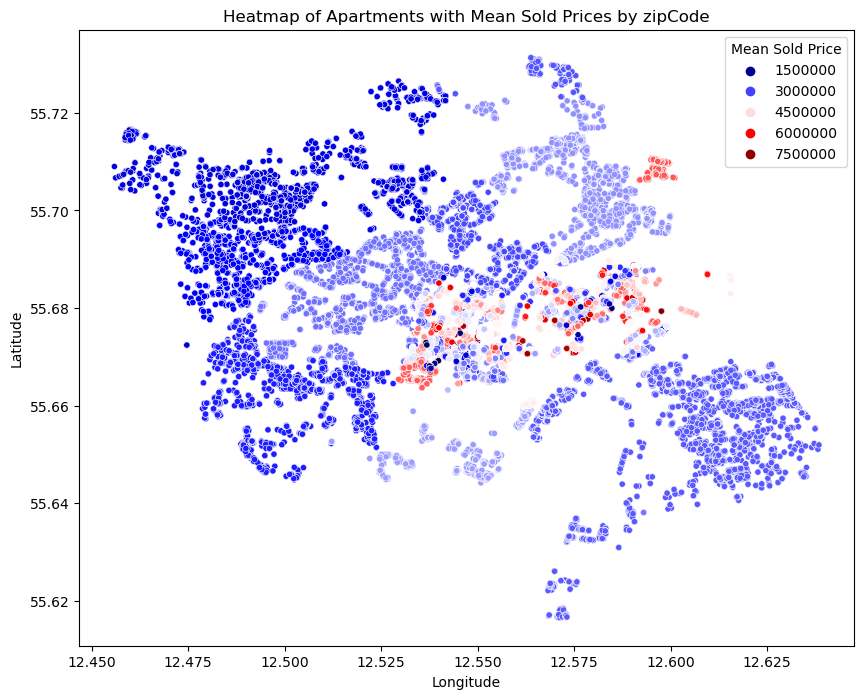

In [110]:
alm_salg_df_zipCode = alm_salg_df.copy()

alm_salg_df_zipCode['price'] = (alm_salg_df_zipCode['price'])

#Step 1: Calculate the mean sold price for each city
mean_prices_zipCode = alm_salg_df_zipCode.groupby('zipCode')['price'].mean().reset_index()

alm_salg_df_zipCode['price'] = (alm_salg_df_zipCode['price'])

# Step 2: Merge the mean sold price back into the original DataFrame
alm_salg_df_groupbby_zipCode = alm_salg_df_zipCode.merge(mean_prices_zipCode, on='zipCode', suffixes=('', '_mean'))

# Step 3: Create a heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(data=alm_salg_df_groupbby_zipCode, x=('longitude'), y='latitude', hue='price_mean', palette='seismic', s=20)
plt.title('Heatmap of Apartments with Mean Sold Prices by zipCode')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Mean Sold Price', loc='upper right')
plt.savefig('heatmap_meansold.pdf')
plt.show()


Make this work with the "ipyleaflet: Interactive maps in the Jupyter notebook"


In [208]:
# Create a map centered at a specific location (you can change the coordinates)
center = (latitude, longitude)
m = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)



In [210]:
for index, row in alm_salg_df.sample(100).iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    marker = Marker(location=(latitude, longitude), title=row['address'])
    m.add_layer(marker)


In [211]:
m.add_control(LayersControl())
m

Map(center=[55.665394, 12.533747], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [ ]:
plt.scatter(df['longitude'], df['latitude'], s= .01, alpha=.5, )

In [ ]:
alm_salg_df[['city']].value_counts(normalize=True)

<br>

### Filtering så man sikre sig at Frb kommune salg er med

In [ ]:
df[df['zipCode']==2000]

<br>

### kigger på de borliger der er slogt til mest for at tjekke om filtrering af outliers af boliger der er slogt til mere end 9 mio

In [ ]:
print('top 10 most expencive appartment\n',alm_salg_df['change'].nlargest(10))